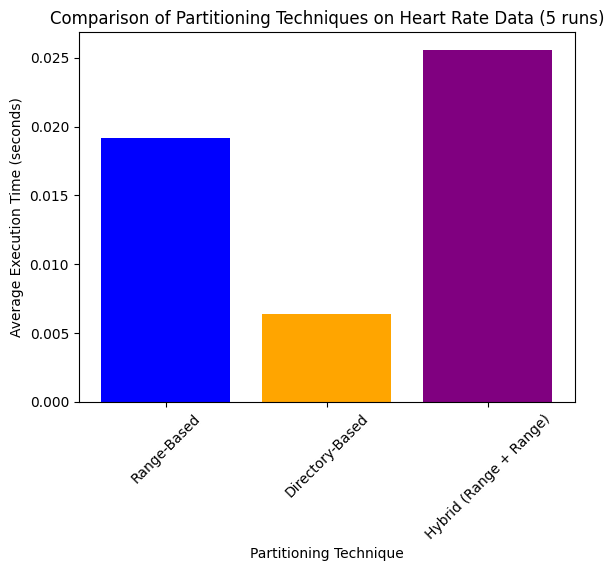

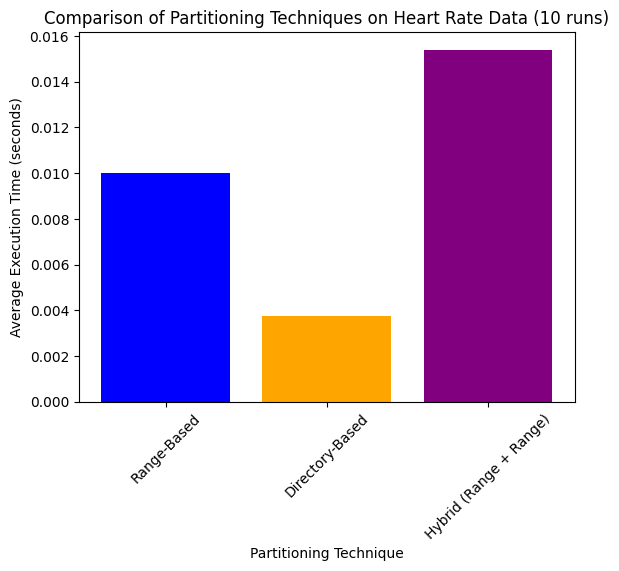

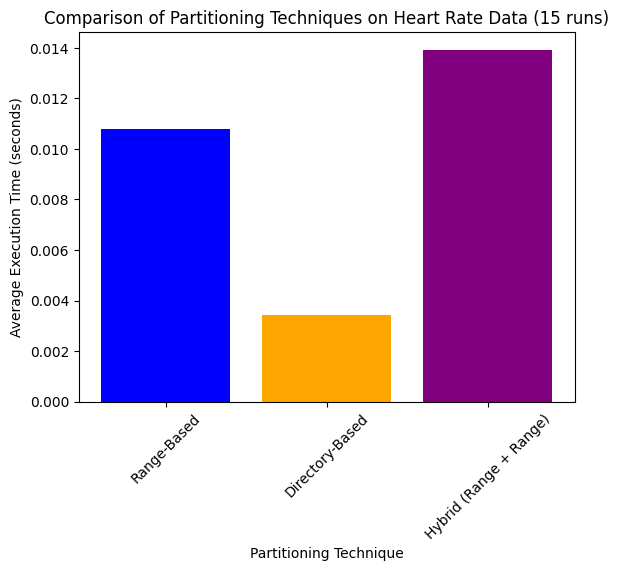

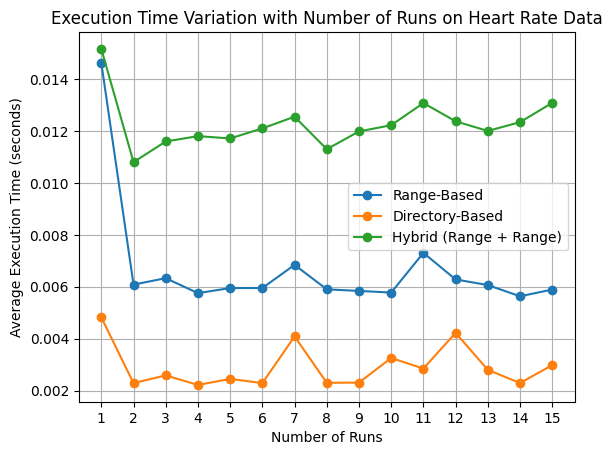

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd

def load_csv_data(filepath):
    """Loads a CSV file and converts it to a list of dictionaries."""
    data = pd.read_csv(filepath)
    return data.to_dict(orient='records')

# Partitioning technique 1: Range-Based Partitioning by Heart Rate
def range_based_partition(data):
    """Partition data by heart rate into ranges."""
    start = time.perf_counter()

    partition_1 = [d for d in data if 60 <= d['Heart_Rate'] < 80]
    partition_2 = [d for d in data if 80 <= d['Heart_Rate'] < 100]
    partition_3 = [d for d in data if 100 <= d['Heart_Rate'] < 120]
    partition_4 = [d for d in data if d['Heart_Rate'] >= 120]

    end = time.perf_counter()
    return end - start

# Partitioning technique 2: Directory-Based Partitioning by Heart Rate Categories
def directory_based_partition(data):
    """Partition data based on Heart Rate categories."""
    start = time.perf_counter()

    directory = {}
    for record in data:
        key = record['Heart_Rate'] // 20
        if key not in directory:
            directory[key] = []
        directory[key].append(record)

    end = time.perf_counter()
    return end - start

# Hybrid Partitioning technique: Hybrid (Range + Range) Partitioning by Heart Rate
def range_range_partition(data):
    """Hybrid partitioning: first by broad ranges, then finer ranges within each."""
    start = time.perf_counter()

    # Define broad range partitions
    broad_range_1 = [d for d in data if 60 <= d['Heart_Rate'] < 100]
    broad_range_2 = [d for d in data if 100 <= d['Heart_Rate'] < 140]
    broad_range_3 = [d for d in data if d['Heart_Rate'] >= 140]

    # Apply finer range partitioning within each broad range
    partition_1 = [d for d in broad_range_1 if 60 <= d['Heart_Rate'] < 70]
    partition_2 = [d for d in broad_range_1 if 70 <= d['Heart_Rate'] < 80]
    partition_3 = [d for d in broad_range_1 if 80 <= d['Heart_Rate'] < 90]
    partition_4 = [d for d in broad_range_1 if 90 <= d['Heart_Rate'] < 100]

    partition_5 = [d for d in broad_range_2 if 100 <= d['Heart_Rate'] < 110]
    partition_6 = [d for d in broad_range_2 if 110 <= d['Heart_Rate'] < 120]
    partition_7 = [d for d in broad_range_2 if 120 <= d['Heart_Rate'] < 130]
    partition_8 = [d for d in broad_range_2 if 130 <= d['Heart_Rate'] < 140]

    partition_9 = [d for d in broad_range_3 if 140 <= d['Heart_Rate'] < 150]
    partition_10 = [d for d in broad_range_3 if 150 <= d['Heart_Rate'] < 160]
    partition_11 = [d for d in broad_range_3 if 160 <= d['Heart_Rate'] < 170]
    partition_12 = [d for d in broad_range_3 if d['Heart_Rate'] >= 170]

    end = time.perf_counter()
    return end - start

def get_average_execution_time(func, data, runs=10):
    """Run partitioning multiple times and return the average execution time."""
    times = []
    for _ in range(runs):
        times.append(func(data))
    return sum(times) / len(times)

file_path = '/content/drive/MyDrive/RESEARCH/personal_health_data.csv'
health_data = load_csv_data(file_path)

def plot_partitioning_comparison(runs):
    """Plots a bar chart comparing partitioning techniques for a given number of runs."""
    range_time = get_average_execution_time(range_based_partition, health_data, runs)
    directory_time = get_average_execution_time(directory_based_partition, health_data, runs)
    range_range_time = get_average_execution_time(range_range_partition, health_data, runs)

    techniques = ['Range-Based', 'Directory-Based', 'Hybrid (Range + Range)']
    times = [range_time, directory_time, range_range_time]

    plt.bar(techniques, times, color=['blue', 'orange', 'purple'])
    plt.xlabel('Partitioning Technique')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title(f'Comparison of Partitioning Techniques on Heart Rate Data ({runs} runs)')
    plt.xticks(rotation=45)
    plt.show()

plot_partitioning_comparison(5)   # Plot for 5 runs
plot_partitioning_comparison(10)  # Plot for 10 runs
plot_partitioning_comparison(15)  # Plot for 15 runs

def plot_execution_time_varying_runs(max_runs):
    """Plots execution times for partitioning techniques varying with number of runs."""
    run_counts = list(range(1, max_runs + 1))
    range_times = []
    directory_times = []
    range_range_times = []

    for runs in run_counts:
        range_time = get_average_execution_time(range_based_partition, health_data, runs)
        directory_time = get_average_execution_time(directory_based_partition, health_data, runs)
        range_range_time = get_average_execution_time(range_range_partition, health_data, runs)

        range_times.append(range_time)
        directory_times.append(directory_time)
        range_range_times.append(range_range_time)

    plt.plot(run_counts, range_times, label='Range-Based', marker='o')
    plt.plot(run_counts, directory_times, label='Directory-Based', marker='o')
    plt.plot(run_counts, range_range_times, label='Hybrid (Range + Range)', marker='o')

    plt.xlabel('Number of Runs')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Execution Time Variation with Number of Runs on Heart Rate Data')
    plt.xticks(run_counts)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_execution_time_varying_runs(15)


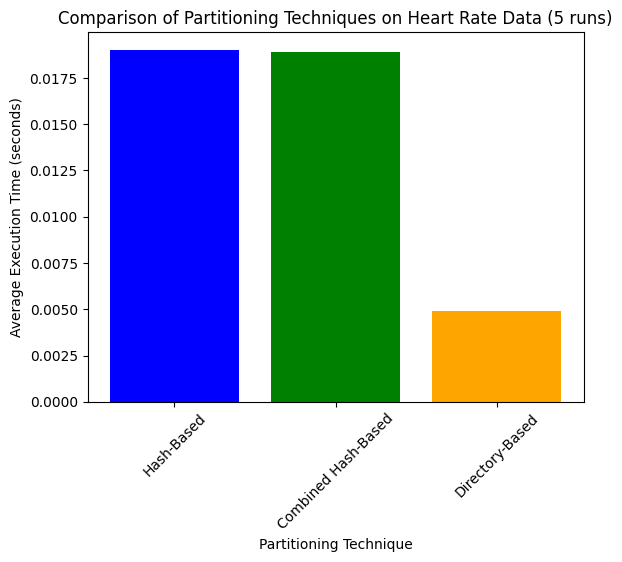

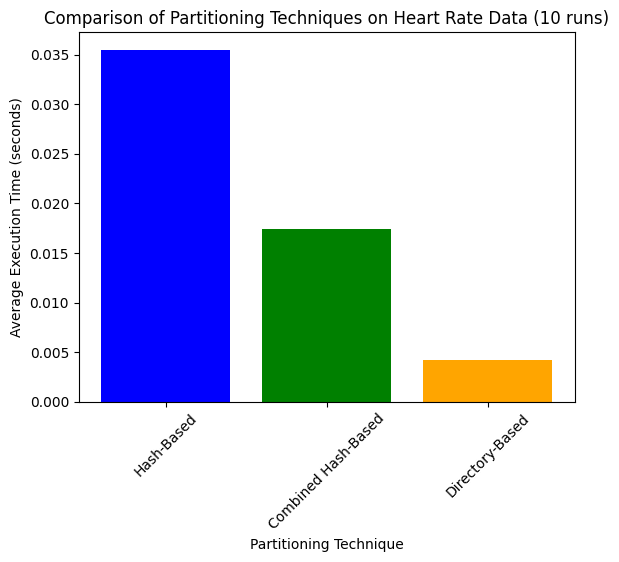

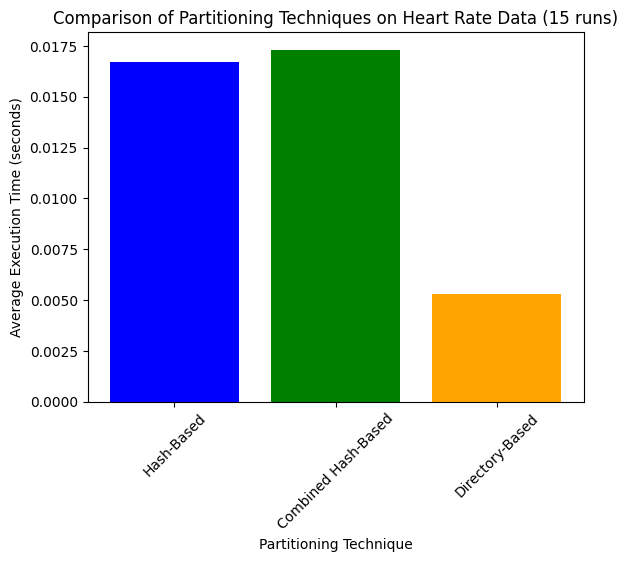

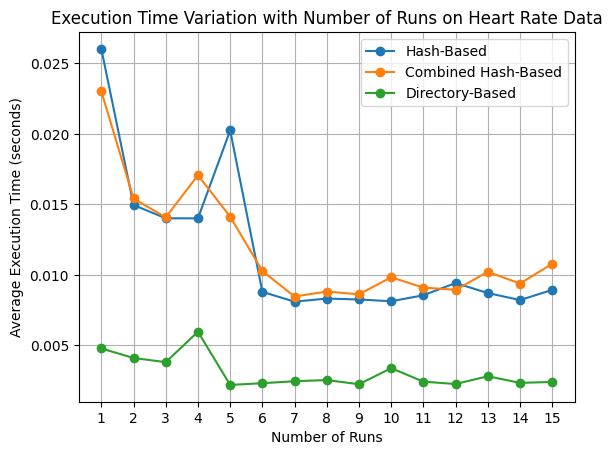

In [6]:
import time
import matplotlib.pyplot as plt
import pandas as pd

def load_csv_data(filepath):
    """Loads a CSV file and converts it to a list of dictionaries."""
    data = pd.read_csv(filepath)
    return data.to_dict(orient='records')

# Partitioning technique 1: Hash-Based Partitioning by Heart Rate
def hash_based_partition(data):
    """Partition data using a hash function based on Heart Rate."""
    start = time.perf_counter()

    partition_1 = [d for d in data if hash(d['Heart_Rate']) % 4 == 0]
    partition_2 = [d for d in data if hash(d['Heart_Rate']) % 4 == 1]
    partition_3 = [d for d in data if hash(d['Heart_Rate']) % 4 == 2]
    partition_4 = [d for d in data if hash(d['Heart_Rate']) % 4 == 3]

    end = time.perf_counter()
    return end - start

# Partitioning technique 2: Combined Hash-Based Partitioning by Heart Rate
def combined_hash_based_partition(data):
    """Apply hash twice: first for broad range and second for finer partitioning."""
    start = time.perf_counter()

    # Broad range hash partitioning
    partition_1 = [d for d in data if hash(d['Heart_Rate']) % 2 == 0]
    partition_2 = [d for d in data if hash(d['Heart_Rate']) % 2 == 1]

    # Fine-grained partitioning within the first broad partition
    partition_1_1 = [d for d in partition_1 if hash(d['Heart_Rate']) % 2 == 0]
    partition_1_2 = [d for d in partition_1 if hash(d['Heart_Rate']) % 2 == 1]

    # Fine-grained partitioning within the second broad partition
    partition_2_1 = [d for d in partition_2 if hash(d['Heart_Rate']) % 2 == 0]
    partition_2_2 = [d for d in partition_2 if hash(d['Heart_Rate']) % 2 == 1]

    end = time.perf_counter()
    return end - start

# Partitioning technique 3: Directory-Based Partitioning by Heart Rate Categories
def directory_based_partition(data):
    """Partition data based on Heart Rate categories."""
    start = time.perf_counter()

    directory = {}
    for record in data:
        key = record['Heart_Rate'] // 20
        if key not in directory:
            directory[key] = []
        directory[key].append(record)

    end = time.perf_counter()
    return end - start

def get_average_execution_time(func, data, runs=10):
    """Run partitioning multiple times and return the average execution time."""
    times = []
    for _ in range(runs):
        times.append(func(data))
    return sum(times) / len(times)

file_path = '/content/drive/MyDrive/RESEARCH/personal_health_data.csv'
health_data = load_csv_data(file_path)

def plot_partitioning_comparison(runs):
    """Plots a bar chart comparing partitioning techniques for a given number of runs."""
    hash_time = get_average_execution_time(hash_based_partition, health_data, runs)
    combined_hash_time = get_average_execution_time(combined_hash_based_partition, health_data, runs)
    directory_time = get_average_execution_time(directory_based_partition, health_data, runs)

    techniques = ['Hash-Based', 'Combined Hash-Based', 'Directory-Based']
    times = [hash_time, combined_hash_time, directory_time]

    plt.bar(techniques, times, color=['blue', 'green', 'orange'])
    plt.xlabel('Partitioning Technique')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title(f'Comparison of Partitioning Techniques on Heart Rate Data ({runs} runs)')
    plt.xticks(rotation=45)
    plt.show()

plot_partitioning_comparison(5)   # Plot for 5 runs
plot_partitioning_comparison(10)  # Plot for 10 runs
plot_partitioning_comparison(15)  # Plot for 15 runs

def plot_execution_time_varying_runs(max_runs):
    """Plots execution times for partitioning techniques varying with number of runs."""
    run_counts = list(range(1, max_runs + 1))
    hash_times = []
    combined_hash_times = []
    directory_times = []

    for runs in run_counts:
        hash_time = get_average_execution_time(hash_based_partition, health_data, runs)
        combined_hash_time = get_average_execution_time(combined_hash_based_partition, health_data, runs)
        directory_time = get_average_execution_time(directory_based_partition, health_data, runs)

        hash_times.append(hash_time)
        combined_hash_times.append(combined_hash_time)
        directory_times.append(directory_time)

    plt.plot(run_counts, hash_times, label='Hash-Based', marker='o')
    plt.plot(run_counts, combined_hash_times, label='Combined Hash-Based', marker='o')
    plt.plot(run_counts, directory_times, label='Directory-Based', marker='o')

    plt.xlabel('Number of Runs')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Execution Time Variation with Number of Runs on Heart Rate Data')
    plt.xticks(run_counts)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_execution_time_varying_runs(15)


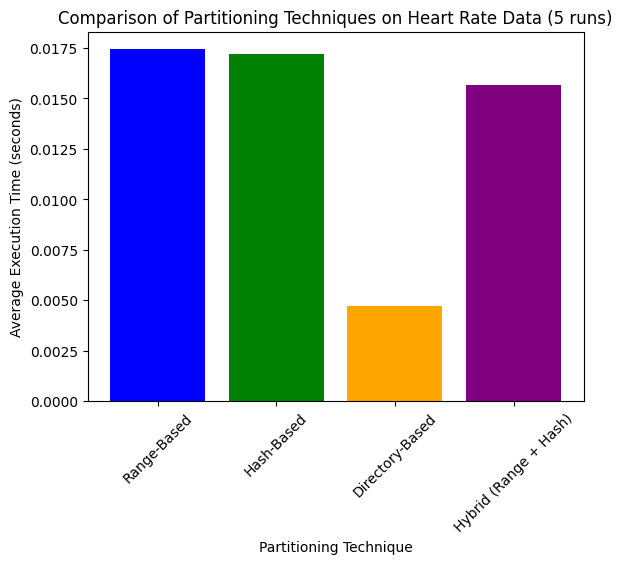

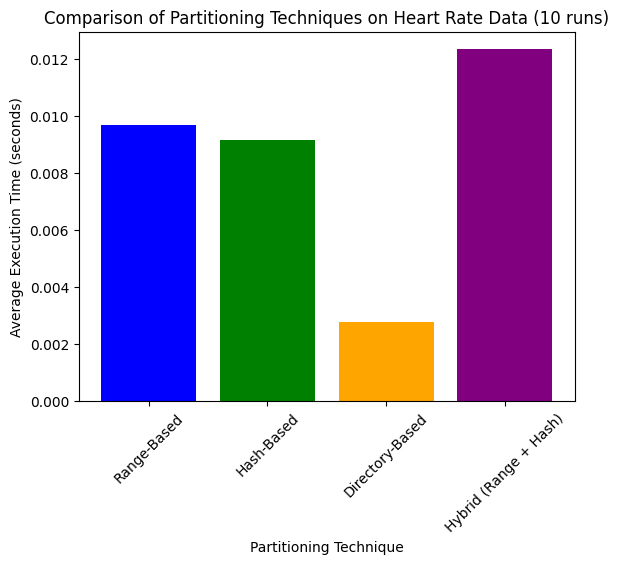

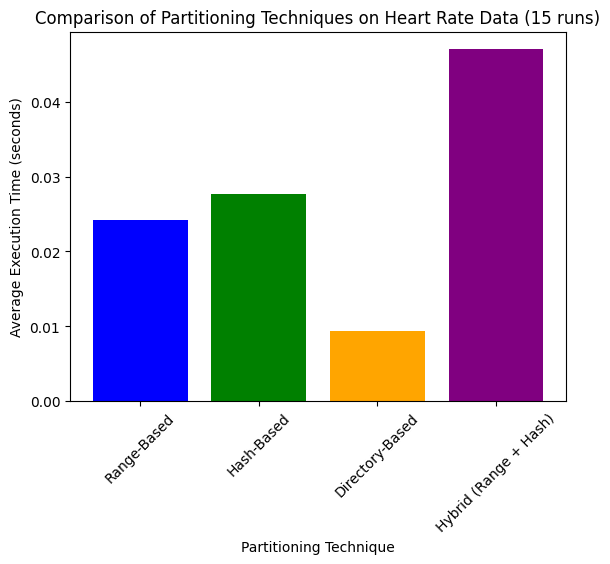

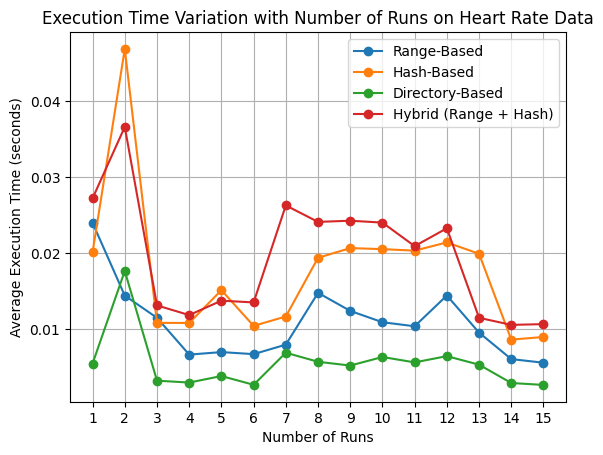

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd

def load_csv_data(filepath):
    """Loads a CSV file and converts it to a list of dictionaries."""
    data = pd.read_csv(filepath)
    return data.to_dict(orient='records')

# Partitioning technique 1: Range-Based Partitioning by Heart Rate
def range_based_partition(data):
    """Partition data by heart rate into ranges."""
    start = time.perf_counter()

    partition_1 = [d for d in data if 60 <= d['Heart_Rate'] < 80]
    partition_2 = [d for d in data if 80 <= d['Heart_Rate'] < 100]
    partition_3 = [d for d in data if 100 <= d['Heart_Rate'] < 120]
    partition_4 = [d for d in data if d['Heart_Rate'] >= 120]

    end = time.perf_counter()
    return end - start

# Partitioning technique 2: Hash-Based Partitioning by Heart Rate
def hash_based_partition(data):
    """Partition data using a hash function based on Heart Rate."""
    start = time.perf_counter()

    partition_1 = [d for d in data if hash(d['Heart_Rate']) % 4 == 0]
    partition_2 = [d for d in data if hash(d['Heart_Rate']) % 4 == 1]
    partition_3 = [d for d in data if hash(d['Heart_Rate']) % 4 == 2]
    partition_4 = [d for d in data if hash(d['Heart_Rate']) % 4 == 3]

    end = time.perf_counter()
    return end - start

# Partitioning technique 3: Directory-Based Partitioning by Heart Rate Categories
def directory_based_partition(data):
    """Partition data based on Heart Rate categories."""
    start = time.perf_counter()

    directory = {}
    for record in data:
        key = record['Heart_Rate'] // 20
        if key not in directory:
            directory[key] = []
        directory[key].append(record)

    end = time.perf_counter()
    return end - start

# Hybrid Partitioning technique: Hybrid (Range + Hash) Partitioning by Heart Rate
def hybrid_partition(data):
    """Hybrid partitioning: first by range, then by hash within each range."""
    start = time.perf_counter()

    # Define range partitions
    range_1 = [d for d in data if 60 <= d['Heart_Rate'] < 80]
    range_2 = [d for d in data if 80 <= d['Heart_Rate'] < 100]
    range_3 = [d for d in data if 100 <= d['Heart_Rate'] < 120]
    range_4 = [d for d in data if d['Heart_Rate'] >= 120]

    # Apply hash-based sub-partitioning within each range
    partition_1 = [d for d in range_1 if hash(d['Heart_Rate']) % 2 == 0]
    partition_2 = [d for d in range_1 if hash(d['Heart_Rate']) % 2 == 1]
    partition_3 = [d for d in range_2 if hash(d['Heart_Rate']) % 2 == 0]
    partition_4 = [d for d in range_2 if hash(d['Heart_Rate']) % 2 == 1]
    partition_5 = [d for d in range_3 if hash(d['Heart_Rate']) % 2 == 0]
    partition_6 = [d for d in range_3 if hash(d['Heart_Rate']) % 2 == 1]
    partition_7 = [d for d in range_4 if hash(d['Heart_Rate']) % 2 == 0]
    partition_8 = [d for d in range_4 if hash(d['Heart_Rate']) % 2 == 1]

    end = time.perf_counter()
    return end - start

def get_average_execution_time(func, data, runs=10):
    """Run partitioning multiple times and return the average execution time."""
    times = []
    for _ in range(runs):
        times.append(func(data))
    return sum(times) / len(times)

file_path = '/content/drive/MyDrive/RESEARCH/personal_health_data.csv'
health_data = load_csv_data(file_path)

def plot_partitioning_comparison(runs):
    """Plots a bar chart comparing partitioning techniques for a given number of runs."""
    range_time = get_average_execution_time(range_based_partition, health_data, runs)
    hash_time = get_average_execution_time(hash_based_partition, health_data, runs)
    directory_time = get_average_execution_time(directory_based_partition, health_data, runs)
    hybrid_time = get_average_execution_time(hybrid_partition, health_data, runs)

    techniques = ['Range-Based', 'Hash-Based', 'Directory-Based', 'Hybrid (Range + Hash)']
    times = [range_time, hash_time, directory_time, hybrid_time]

    plt.bar(techniques, times, color=['blue', 'green', 'orange', 'purple'])
    plt.xlabel('Partitioning Technique')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title(f'Comparison of Partitioning Techniques on Heart Rate Data ({runs} runs)')
    plt.xticks(rotation=45)
    plt.show()

plot_partitioning_comparison(5)   # Plot for 5 runs
plot_partitioning_comparison(10)  # Plot for 10 runs
plot_partitioning_comparison(15)  # Plot for 15 runs

def plot_execution_time_varying_runs(max_runs):
    """Plots execution times for partitioning techniques varying with number of runs."""
    run_counts = list(range(1, max_runs + 1))
    range_times = []
    hash_times = []
    directory_times = []
    hybrid_times = []

    for runs in run_counts:
        range_time = get_average_execution_time(range_based_partition, health_data, runs)
        hash_time = get_average_execution_time(hash_based_partition, health_data, runs)
        directory_time = get_average_execution_time(directory_based_partition, health_data, runs)
        hybrid_time = get_average_execution_time(hybrid_partition, health_data, runs)

        range_times.append(range_time)
        hash_times.append(hash_time)
        directory_times.append(directory_time)
        hybrid_times.append(hybrid_time)

    plt.plot(run_counts, range_times, label='Range-Based', marker='o')
    plt.plot(run_counts, hash_times, label='Hash-Based', marker='o')
    plt.plot(run_counts, directory_times, label='Directory-Based', marker='o')
    plt.plot(run_counts, hybrid_times, label='Hybrid (Range + Hash)', marker='o')

    plt.xlabel('Number of Runs')
    plt.ylabel('Average Execution Time (seconds)')
    plt.title('Execution Time Variation with Number of Runs on Heart Rate Data')
    plt.xticks(run_counts)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_execution_time_varying_runs(15)
